2.1.Ví dụ 1. Nhắc lại ví dụ ở bài lý thuyết:
Chúng ta sẽ xét ví dụ nhân tạo với đầu vào là 3 tập ngẫu nhiên, mỗi tập N điểm được khởi tạo theo phân bố
Gaussian (phân bố chuẩn) có 3 kỳ vọng ( tâm cụm) xác định trước là means[1,:], means[2,:] và means[3,:];
có chung ma trận hiệp phương sai là cov[].

In [74]:
# Gọi các thư viện cần thiết
# Ta tự xây dựng phần k-means nên sẽ không gọi sklearn
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings("ignore")
np.random.seed(11)
# Kỳ vọng và hiệp phương sai của 3 cụm dữ liệu
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
# Số điểm mỗi cụm dữ liệu
N = 500
# Tạo các cụm dữ liệu qua phân bố chuẩn (Gaussian)
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# Tổng hợp dữ liệu từ các cụm
X = np.concatenate((X0, X1, X2), axis = 0)
# Số cụm = 3
K = 3
# Gán nhãn ban đầu cho các cụm, sau đó ta test model và so sánh
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [75]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

In [76]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [77]:
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [78]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
        return centers

In [79]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [80]:
def kmeans(X, K):
        centers = [kmeans_init_centers(X, K)]
        labels = []
        it = 0
        while True:
            labels.append(kmeans_assign_labels(X, centers[-1]))
            new_centers = kmeans_update_centers(X, labels[-1], K)
            if has_converged(centers[-1], new_centers):
                break
            centers.append(new_centers)
            it += 1
        return (centers, labels, it)

Centers found by our algorithm:
[[5.12562404 4.26397581]
 [0.         0.        ]
 [0.         0.        ]]


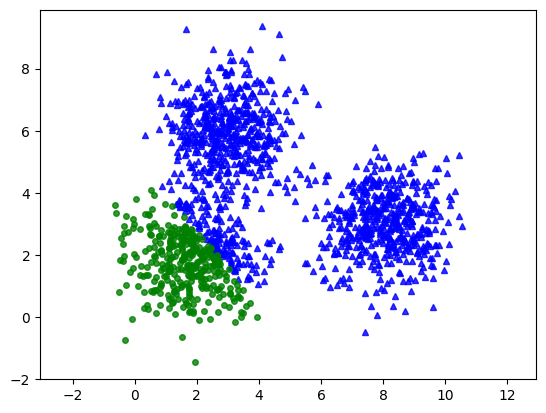

In [81]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])

2.2.Ví dụ 2: Thực hiện phân cụm cho bộ dữ liệu chữ số viết tay
Hãy tìm lại phần thực hành đọc dữ liệu từ tệp chứa thông tin hình ảnh các chữ số viết tay và thực hiện việc
phân cụm dữ liệu vào 10 cụm (10 chữ số viết tay) theo cách sau: Đọc 5000 mẫu dữ liệu từ phần training, sau

đó thực hiện phân cụm bằng phương pháp k-means, tiếp theo hãy kiểm tra xem trong mỗi cụm, tỷ lệ có nhãn
nào (từ 0 đến 9) là cao nhất. Sau đó đếm và in ra tỷ lệ các mẫu không thuộc nhãn đó nhưng được phân vào
cùng một cụm với nhãn.

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
# Fetch MNIST data
mnist = fetch_openml('mnist_784')
X = mnist.data[:5000]
y = mnist.target[:5000]


In [83]:
from sklearn.preprocessing import StandardScaler
# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering with k-means
kmeans = KMeans(n_clusters=10, random_state=42)
predicted_labels = kmeans.fit_predict(X)

unique_clusters = np.unique(predicted_labels)
unique_labels = np.unique(y)

misclassified_ratios = np.zeros((10, 10))

for cluster in unique_clusters:
    cluster_size = len(y[predicted_labels == cluster])
    for label in unique_labels:
        indices = np.where((predicted_labels == cluster) & (y == label))[0]
        n_misclassified = len(indices) - np.sum(y[indices] == label)
        if n_misclassified > 0:
            misclassified_ratio = n_misclassified / len(indices)
            print(f"Cluster {cluster}, Label {label}, Misclassified ratio: {misclassified_ratio:.3f}, Incorrectly classified: {n_misclassified}/{len(indices)}")
        else:
            n_classified = len(indices)
            print(f"Cluster {cluster}, Label {label}, Classified correctly: {n_classified}/{cluster_size} ({n_classified/cluster_size:.3f})")

Cluster 0, Label 0, Classified correctly: 5/482 (0.010)
Cluster 0, Label 1, Classified correctly: 1/482 (0.002)
Cluster 0, Label 2, Classified correctly: 13/482 (0.027)
Cluster 0, Label 3, Classified correctly: 9/482 (0.019)
Cluster 0, Label 4, Classified correctly: 195/482 (0.405)
Cluster 0, Label 5, Classified correctly: 17/482 (0.035)
Cluster 0, Label 6, Classified correctly: 38/482 (0.079)
Cluster 0, Label 7, Classified correctly: 67/482 (0.139)
Cluster 0, Label 8, Classified correctly: 16/482 (0.033)
Cluster 0, Label 9, Classified correctly: 121/482 (0.251)
Cluster 1, Label 0, Classified correctly: 2/636 (0.003)
Cluster 1, Label 1, Classified correctly: 0/636 (0.000)
Cluster 1, Label 2, Classified correctly: 2/636 (0.003)
Cluster 1, Label 3, Classified correctly: 8/636 (0.013)
Cluster 1, Label 4, Classified correctly: 175/636 (0.275)
Cluster 1, Label 5, Classified correctly: 35/636 (0.055)
Cluster 1, Label 6, Classified correctly: 0/636 (0.000)
Cluster 1, Label 7, Classified corre

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)


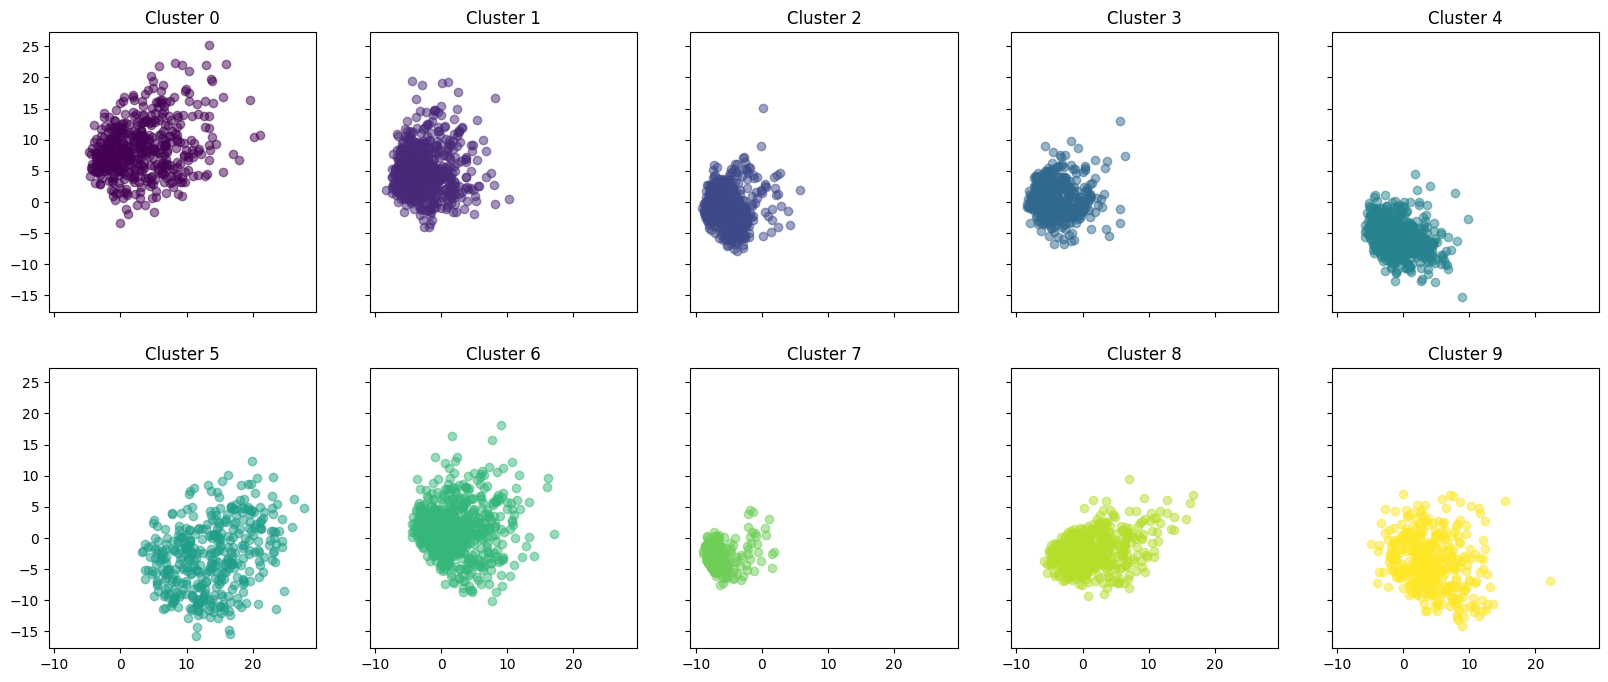

In [85]:
import matplotlib.pyplot as plt

# Define color map
cmap = plt.cm.get_cmap('viridis', 10)

# Plot clusters
fig, axs = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20, 8))
for cluster in unique_clusters:
    indices = np.where(predicted_labels == cluster)
    axs.flat[cluster].scatter(X_reduced[indices, 0], X_reduced[indices, 1], c=cmap(cluster), alpha=0.5)
    axs.flat[cluster].set(title=f"Cluster {cluster}")
plt.show()
